In [1]:
import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scvi
import seaborn as sns
import torch
from embedding_scvi import EmbeddingSCVI
from scipy.spatial.distance import pdist, squareform


scvi.settings.seed = 2023
sns.set_theme()
torch.set_float32_matmul_precision("medium")

Global seed set to 2023


In [2]:
adata = anndata.read_h5ad("/home/martinkim/data/ibd/ibd_all.h5ad")

In [3]:
model = EmbeddingSCVI.load("/home/martinkim/data/ibd/models/donorid_LayerChem_validation_loss/model/", adata=adata)

INFO     File /home/martinkim/data/ibd/models/donorid_LayerChem_validation_loss/model/model.pt already downloaded  


I0000 00:00:1695765038.196734  347449 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [4]:
def plot_covariate_distances(
    model: EmbeddingSCVI, 
    adata: anndata.AnnData, 
    covariate_key: str, 
    figsize: tuple[int, int] = (12, 10)
):
    manager = model.get_anndata_manager(adata)
    covariates = manager.get_state_registry(scvi.REGISTRY_KEYS.CAT_COVS_KEY).mappings[covariate_key].tolist()

    dists_df = pd.DataFrame(
        squareform(pdist(model.get_covariate_representation(covariate_key))), 
        index=covariates, 
        columns=covariates
    )
    plt.figure(figsize=figsize)
    sns.heatmap(dists_df)

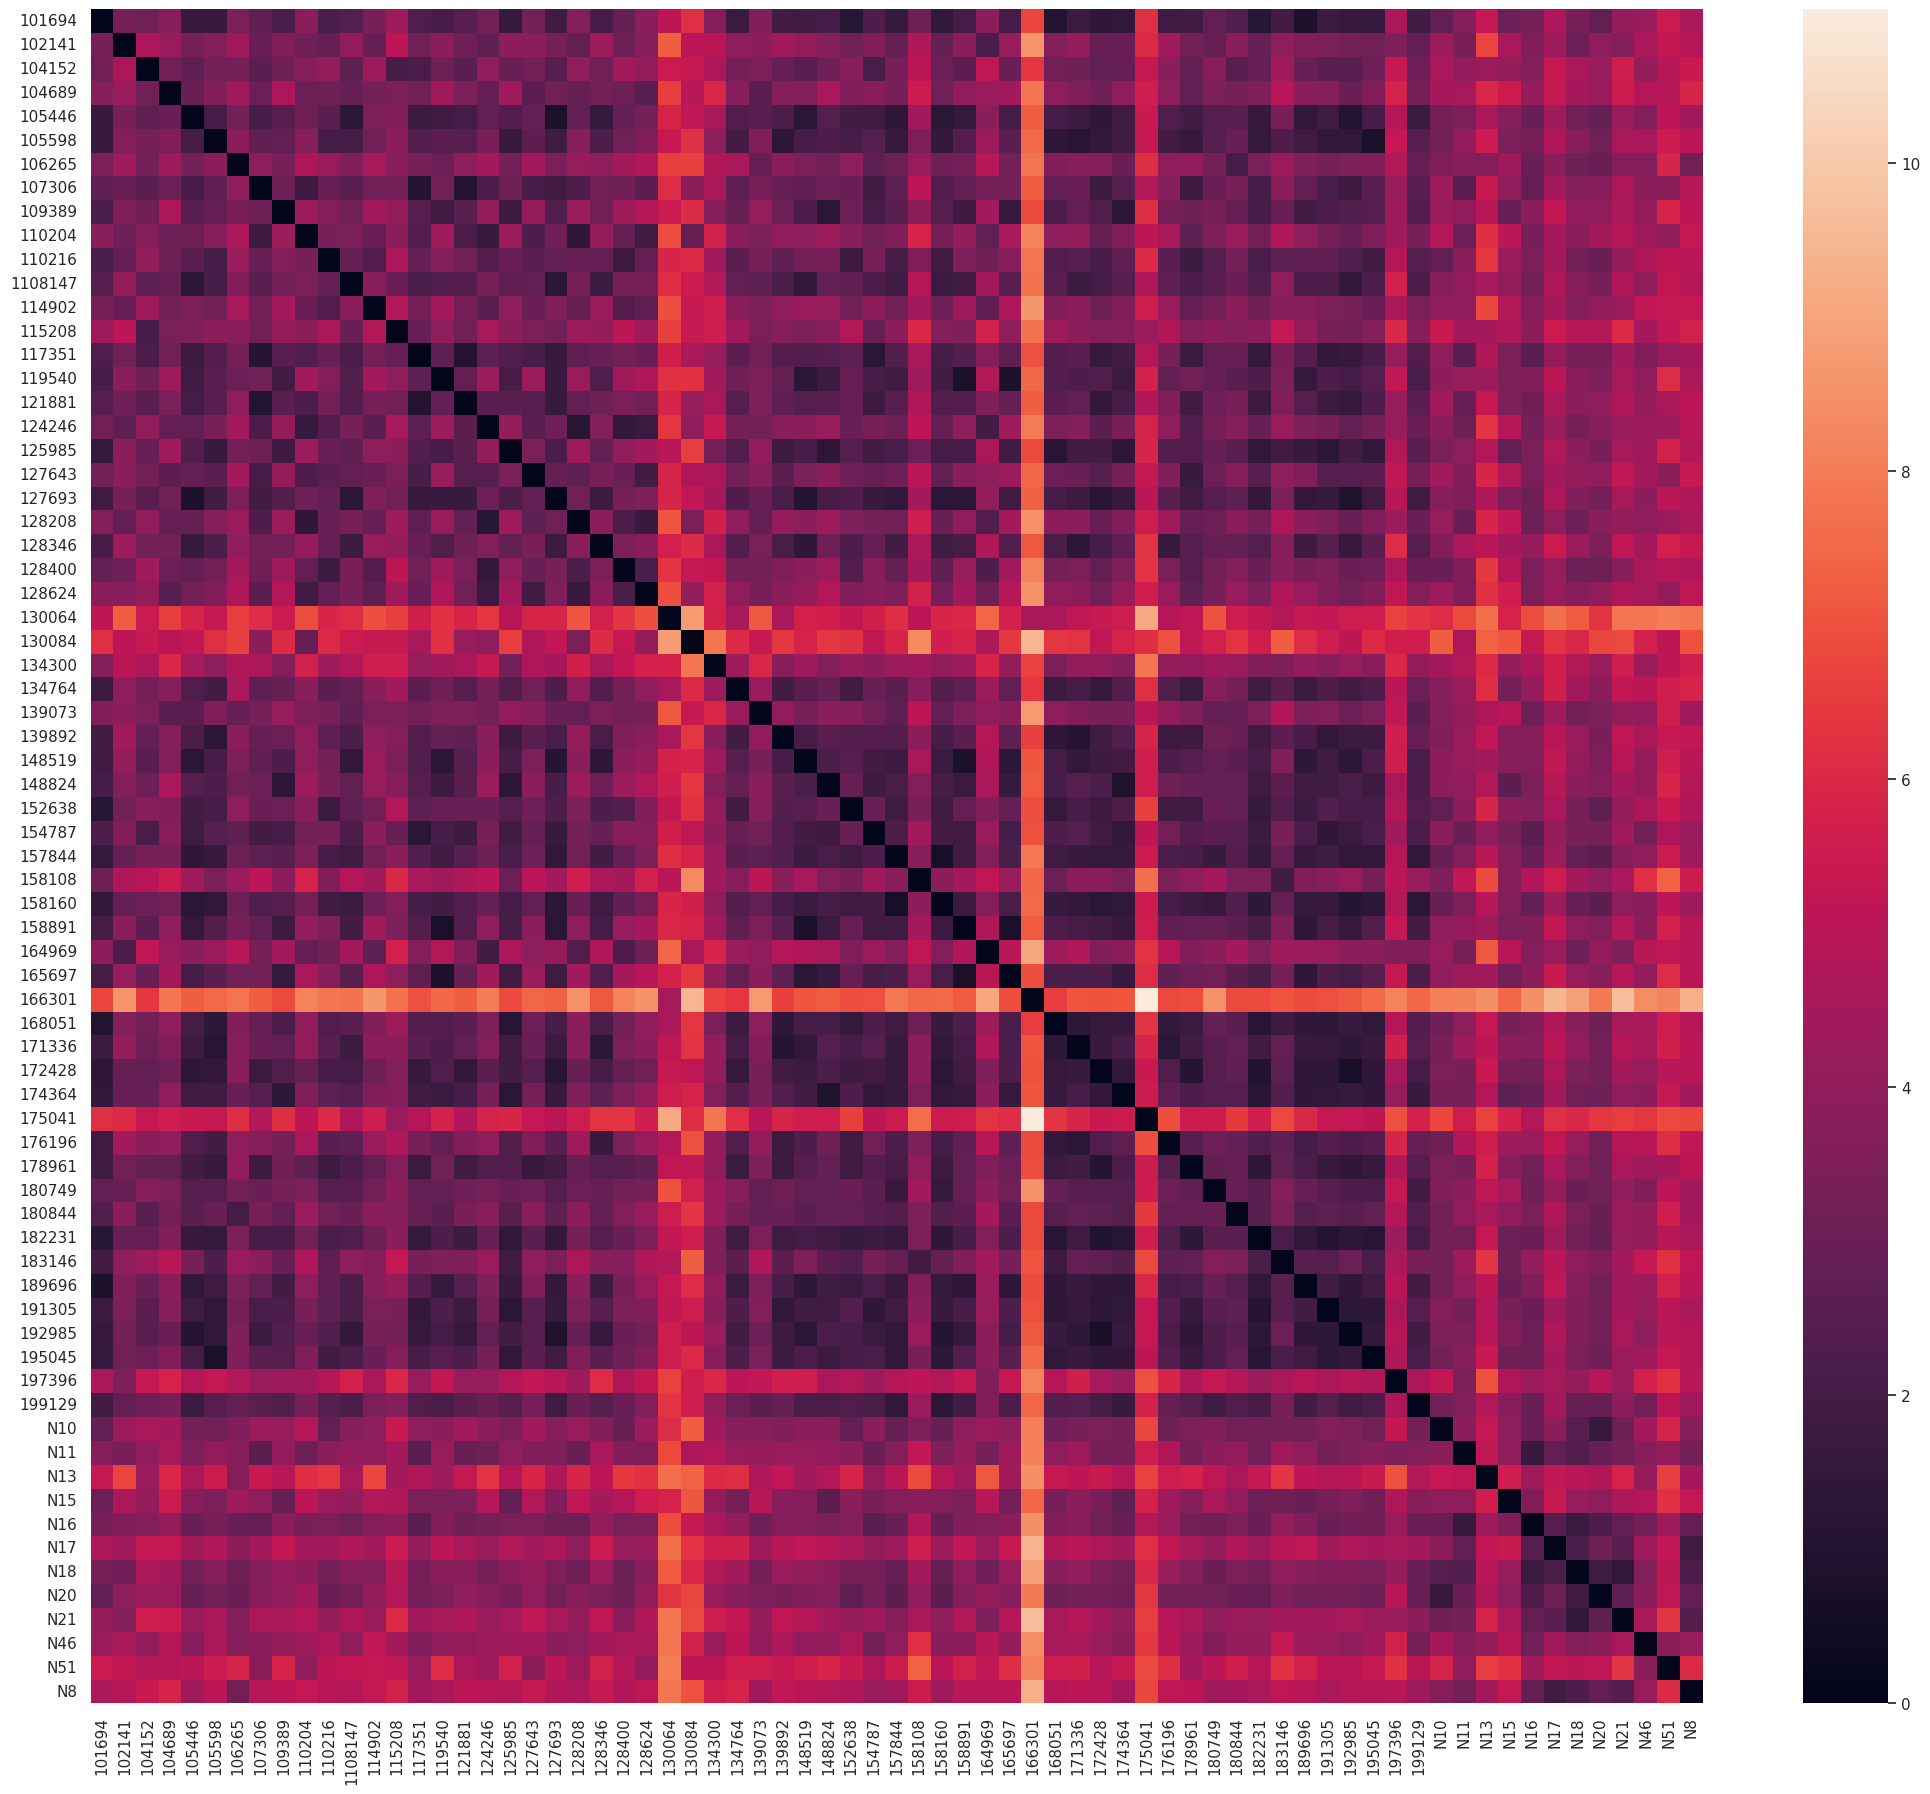

In [6]:
plot_covariate_distances(model, adata, "donor_id", figsize=(26, 22))

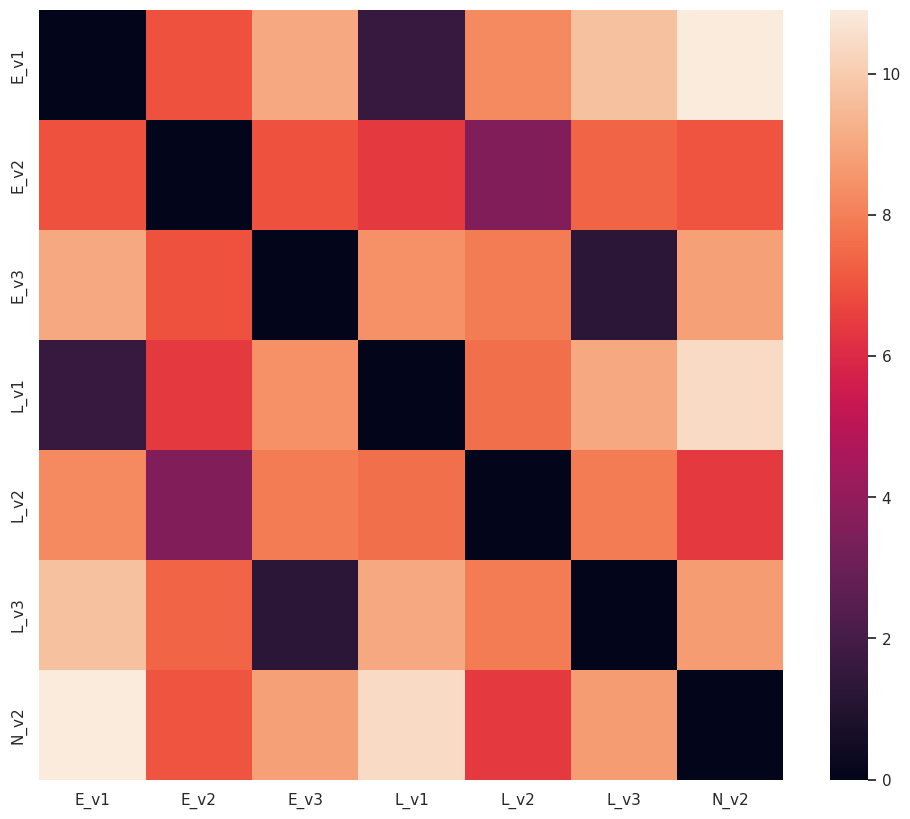

In [7]:
plot_covariate_distances(model, adata, "Layer_Chem")

In [8]:
latent_key = "X_scvi"
adata.obsm[latent_key] = model.get_latent_representation(give_mean=False)

In [9]:
sc.pp.neighbors(adata, use_rep=latent_key, n_neighbors=30)

In [10]:
sc.tl.umap(adata, min_dist=0.1)

/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


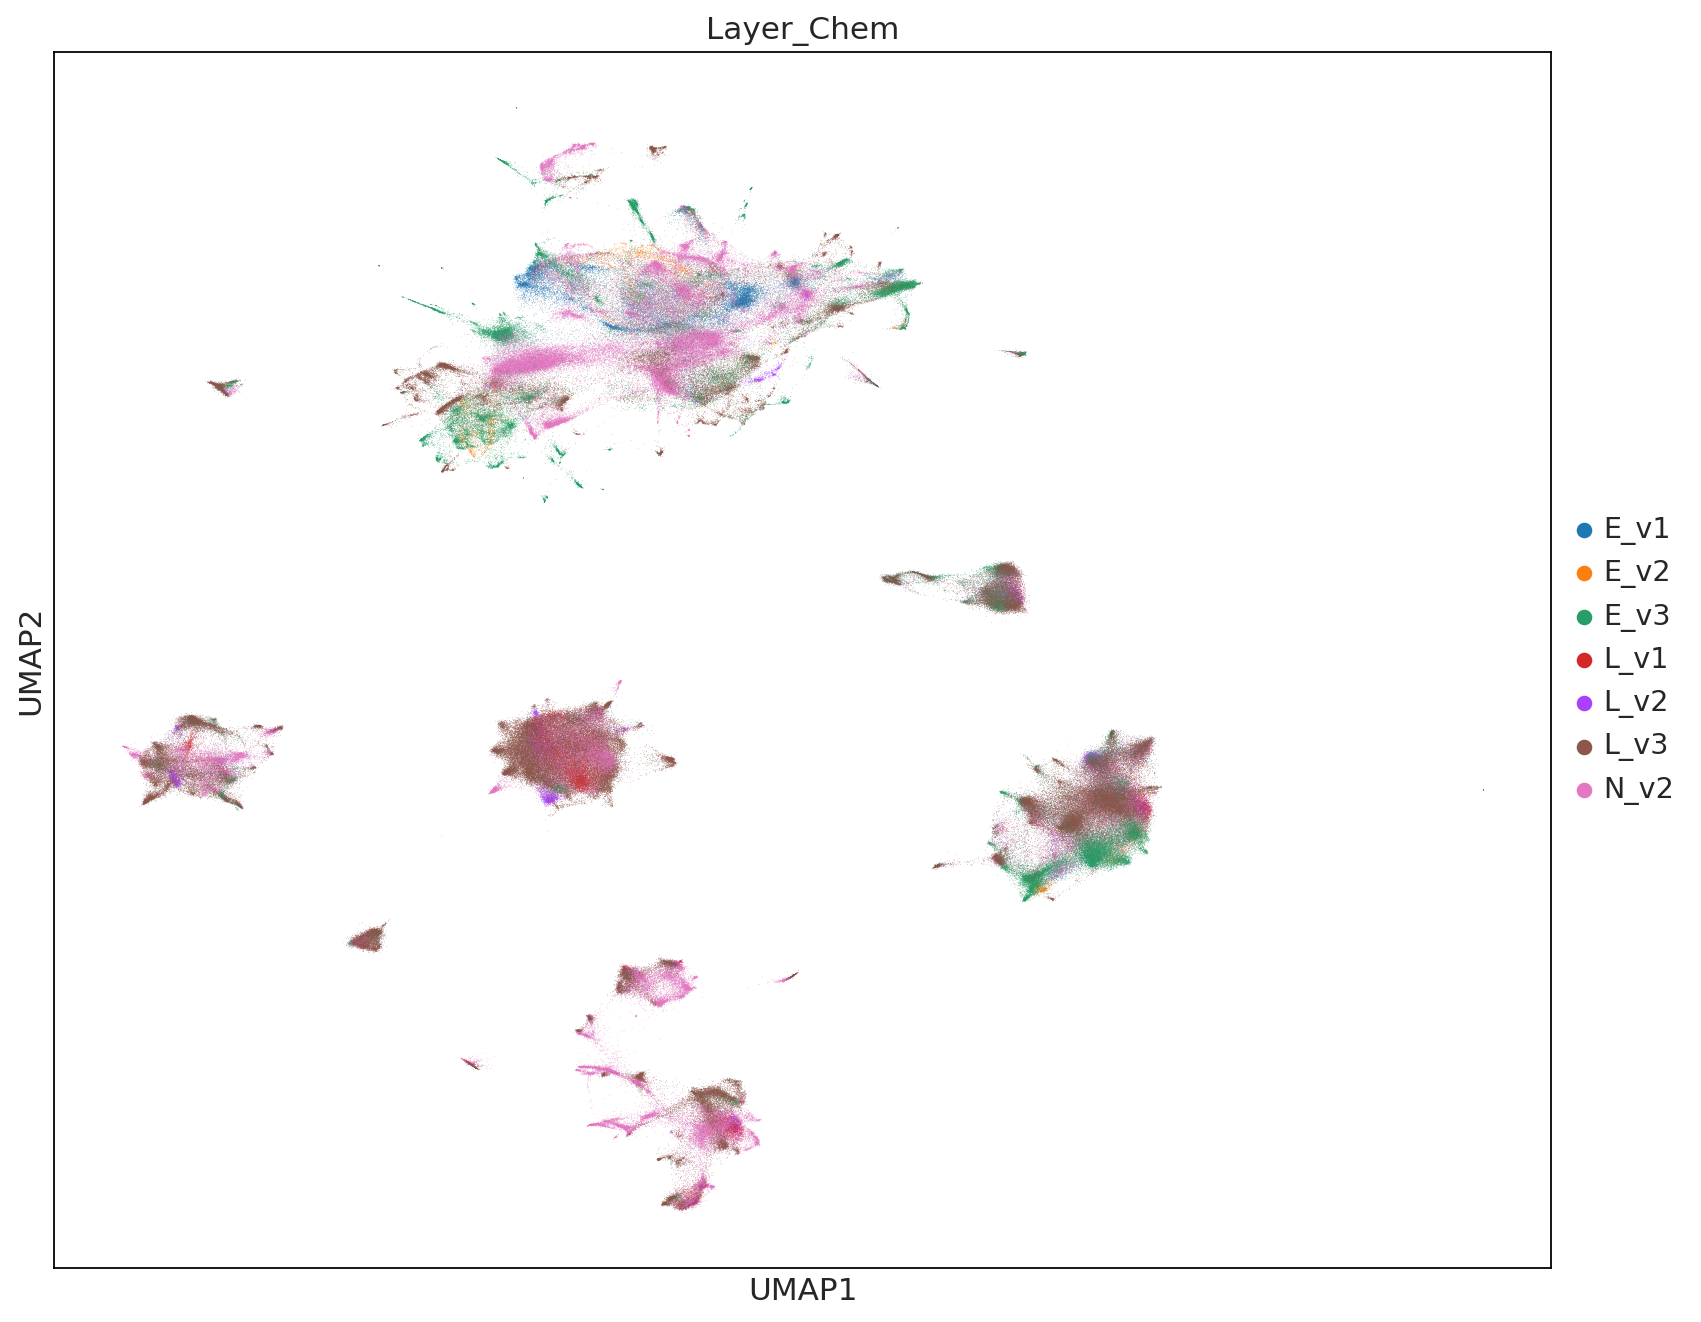

In [11]:
sc.set_figure_params(figsize=(12, 10))
sc.pl.umap(adata, color="Layer_Chem")

/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


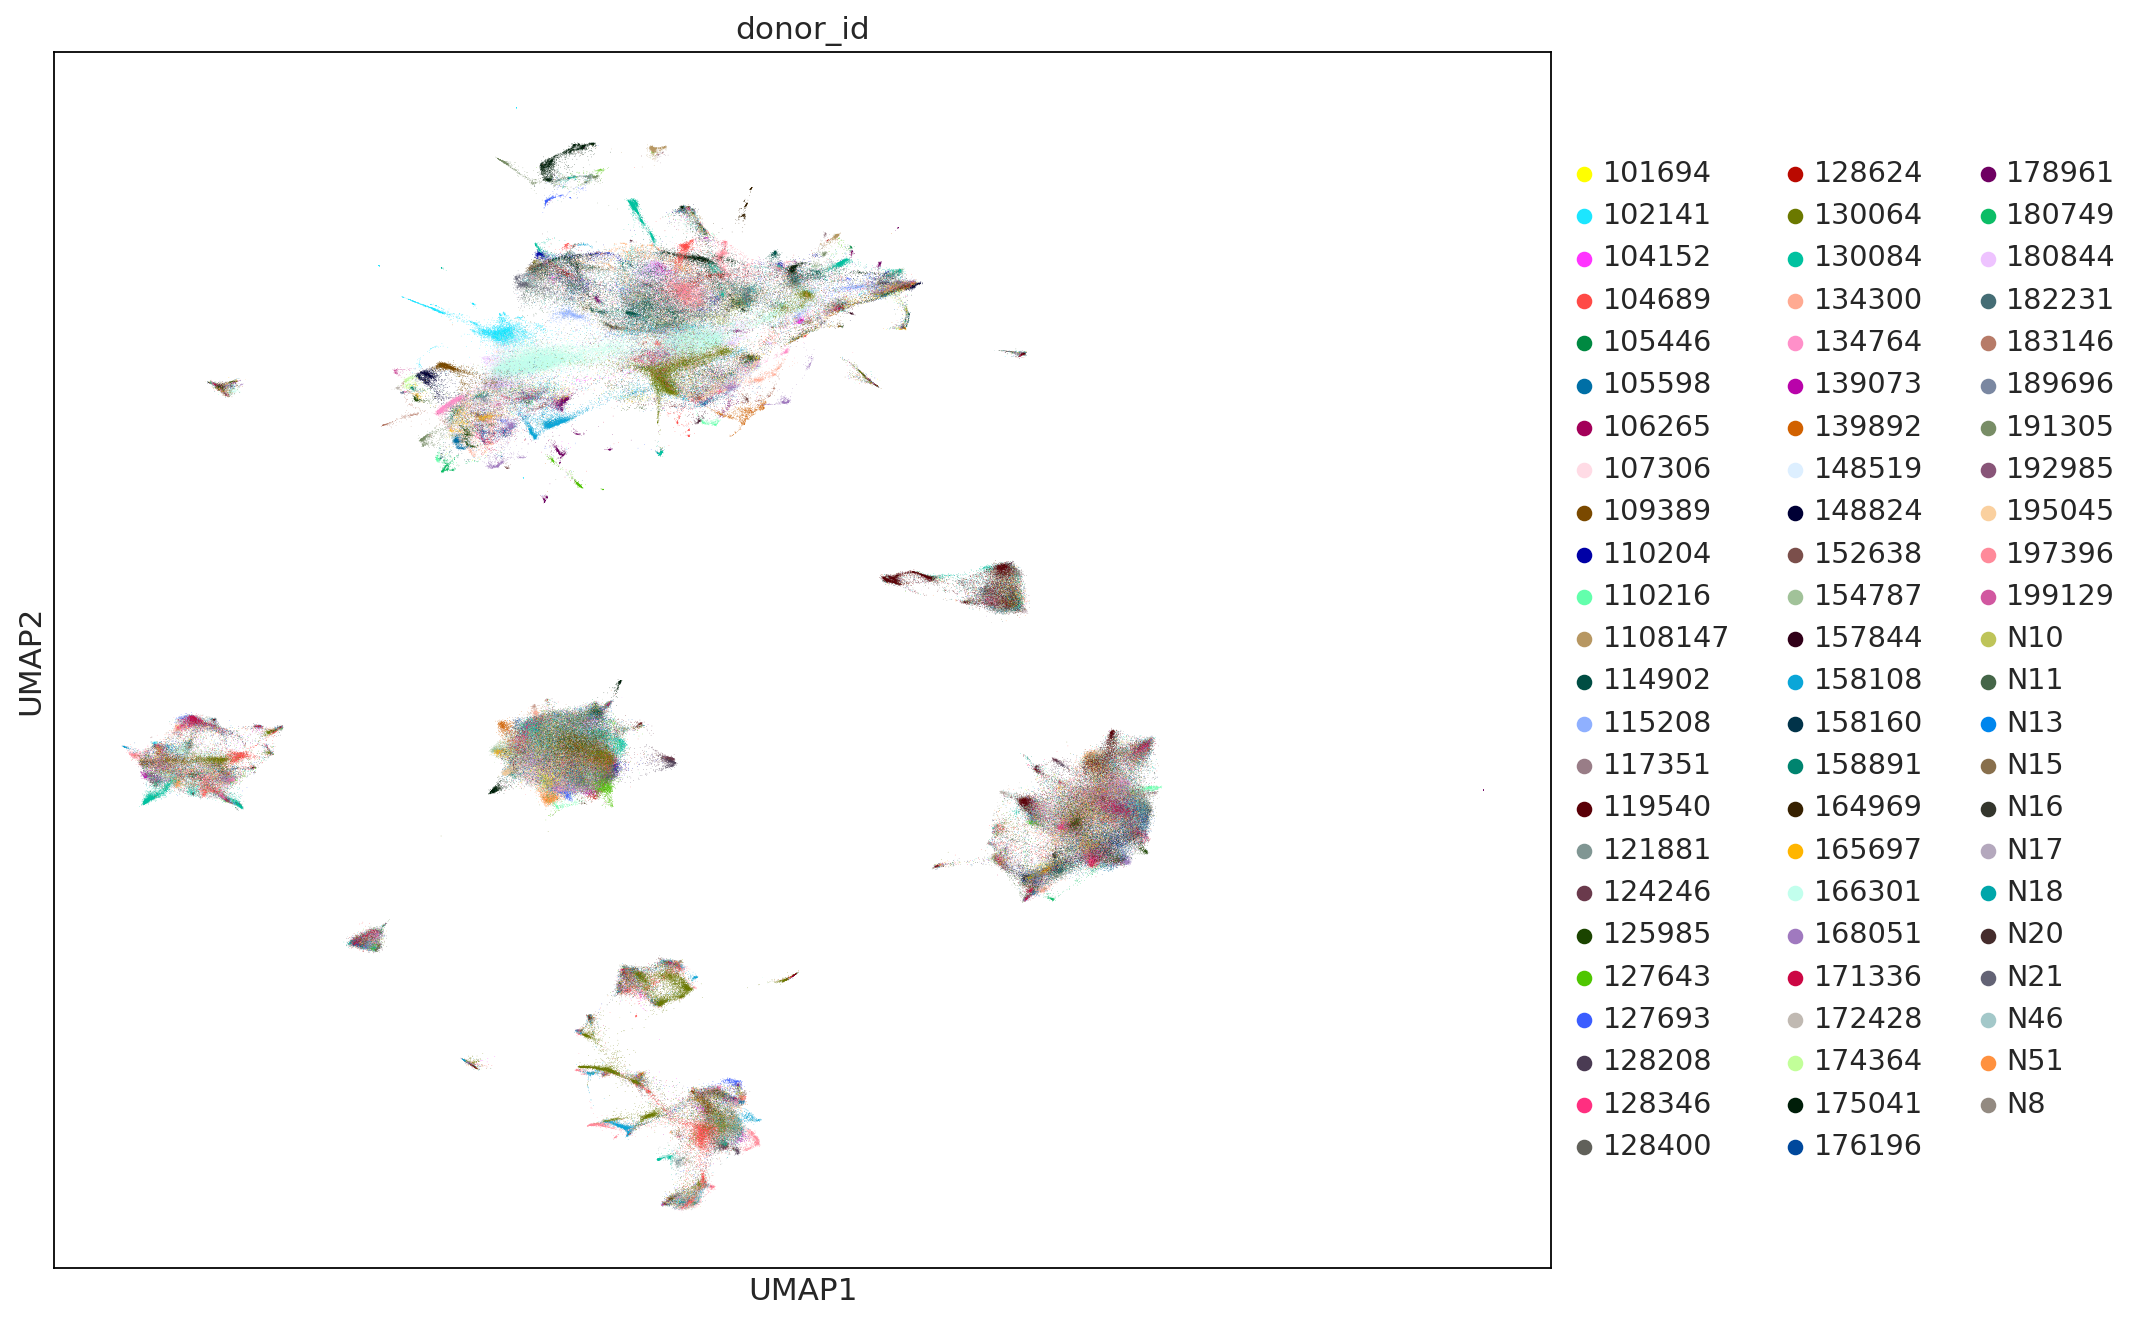

In [12]:
sc.pl.umap(adata, color="donor_id")

/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


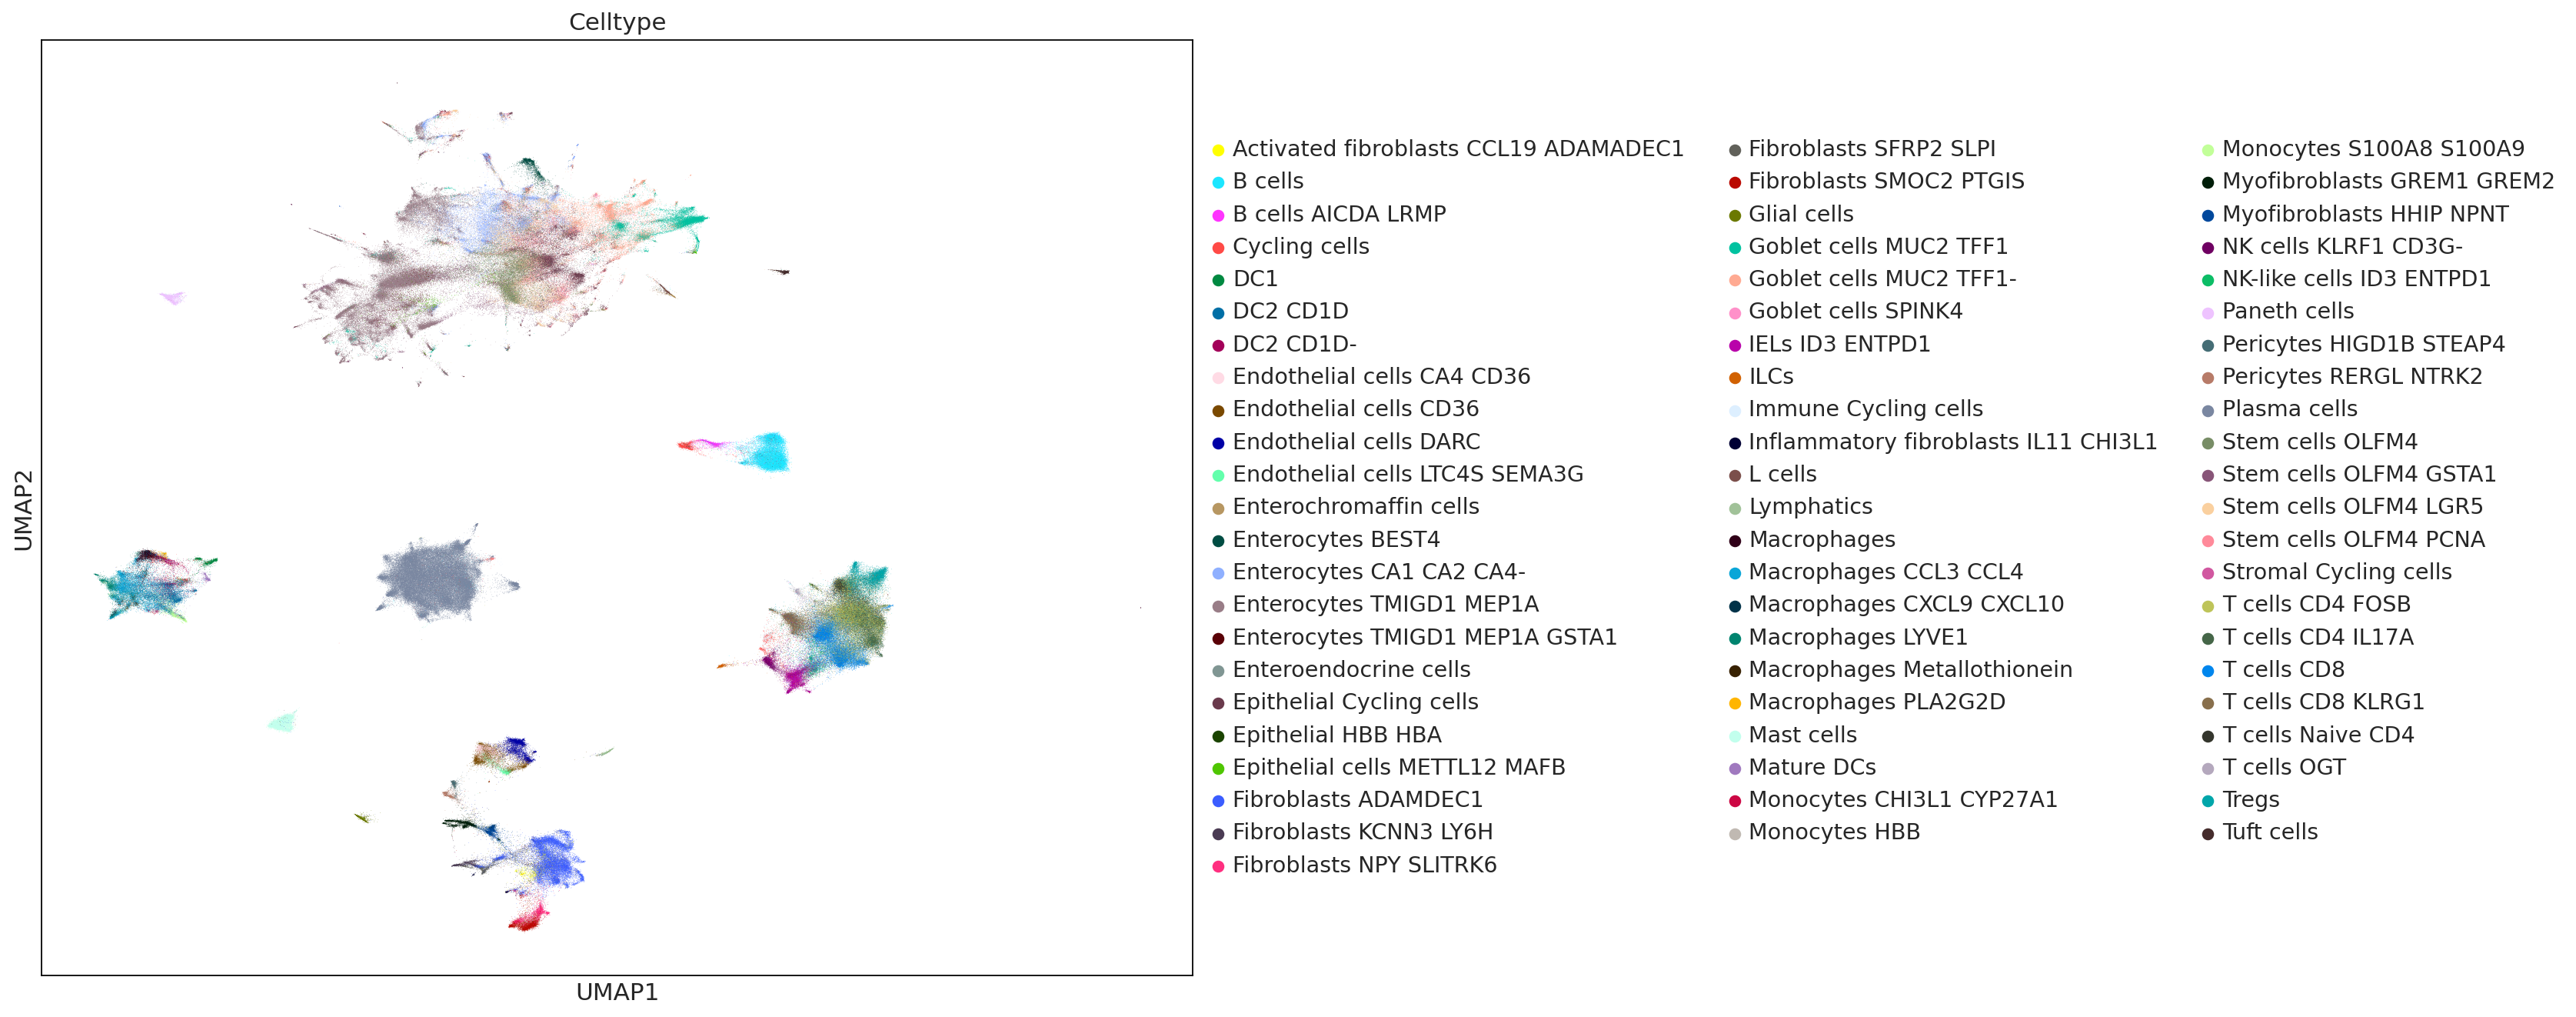

In [13]:
sc.pl.umap(adata, color="Celltype")

/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/martinkim/bin/mambaforge/envs/scvi-tools-dev/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


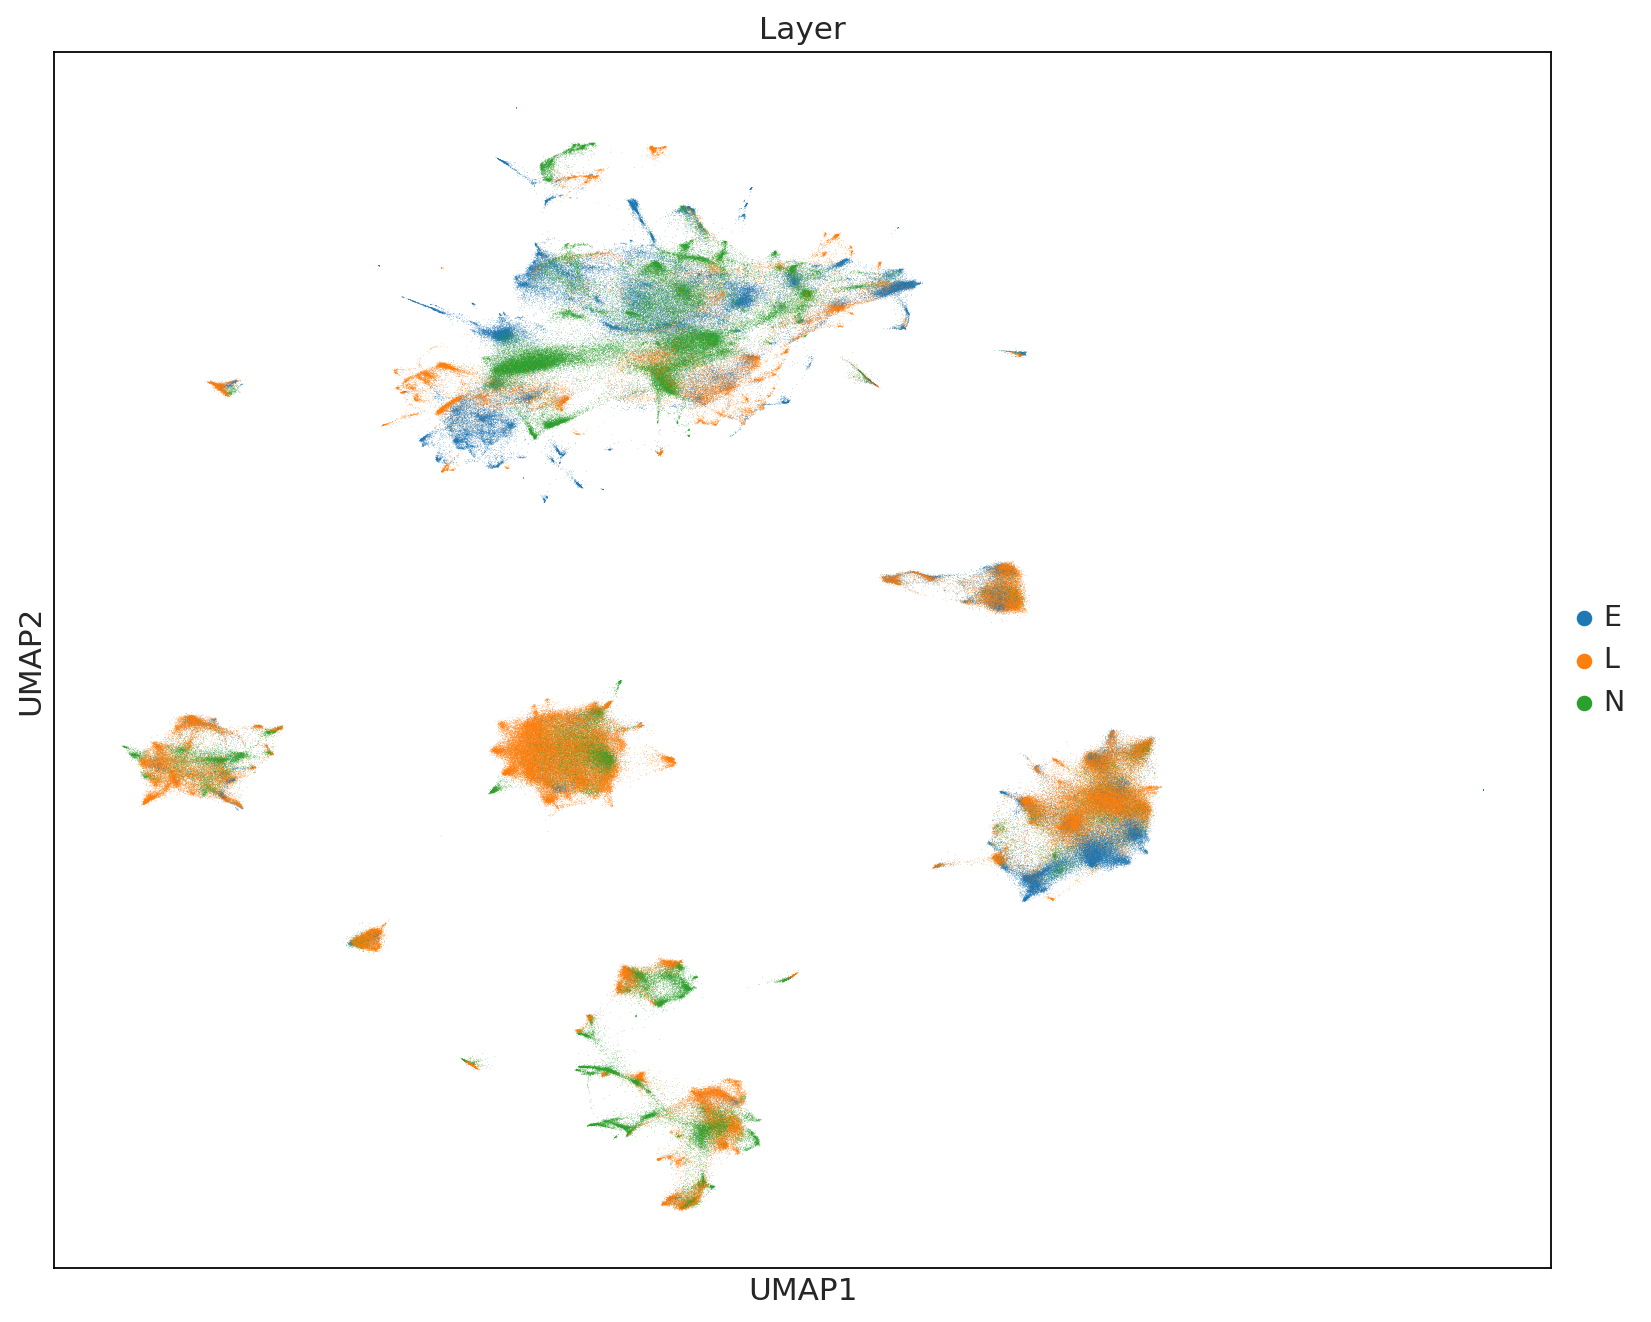

In [14]:
sc.pl.umap(adata, color="Layer")